# Data Exploration

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
583,6842,SDS011,3460,52.028,8.916,2020-09-12T23:49:33,7.87,NaN,NaN,5.67,NaN,NaN
584,6842,SDS011,3460,52.028,8.916,2020-09-12T23:51:59,7.87,NaN,NaN,5.90,NaN,NaN
585,6842,SDS011,3460,52.028,8.916,2020-09-12T23:54:25,11.17,NaN,NaN,5.43,NaN,NaN
586,6842,SDS011,3460,52.028,8.916,2020-09-12T23:56:51,12.33,NaN,NaN,5.97,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,6935.0,6935.0,6.935000e+03,6.935000e+03,6935.000000,0.0,0.0,6935.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,8.448298,NaN,NaN,4.918539,NaN,NaN
std,0.0,0.0,7.105940e-15,1.776485e-15,8.010636,NaN,NaN,5.654931,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.500000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,4.730000,NaN,NaN,2.100000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,6.870000,NaN,NaN,3.300000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,9.530000,NaN,NaN,5.330000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-12 23:49:33,6842,SDS011,3460,52.028,8.916,7.87,NaN,NaN,5.67,NaN,NaN
2020-09-12 23:51:59,6842,SDS011,3460,52.028,8.916,7.87,NaN,NaN,5.90,NaN,NaN
2020-09-12 23:54:25,6842,SDS011,3460,52.028,8.916,11.17,NaN,NaN,5.43,NaN,NaN


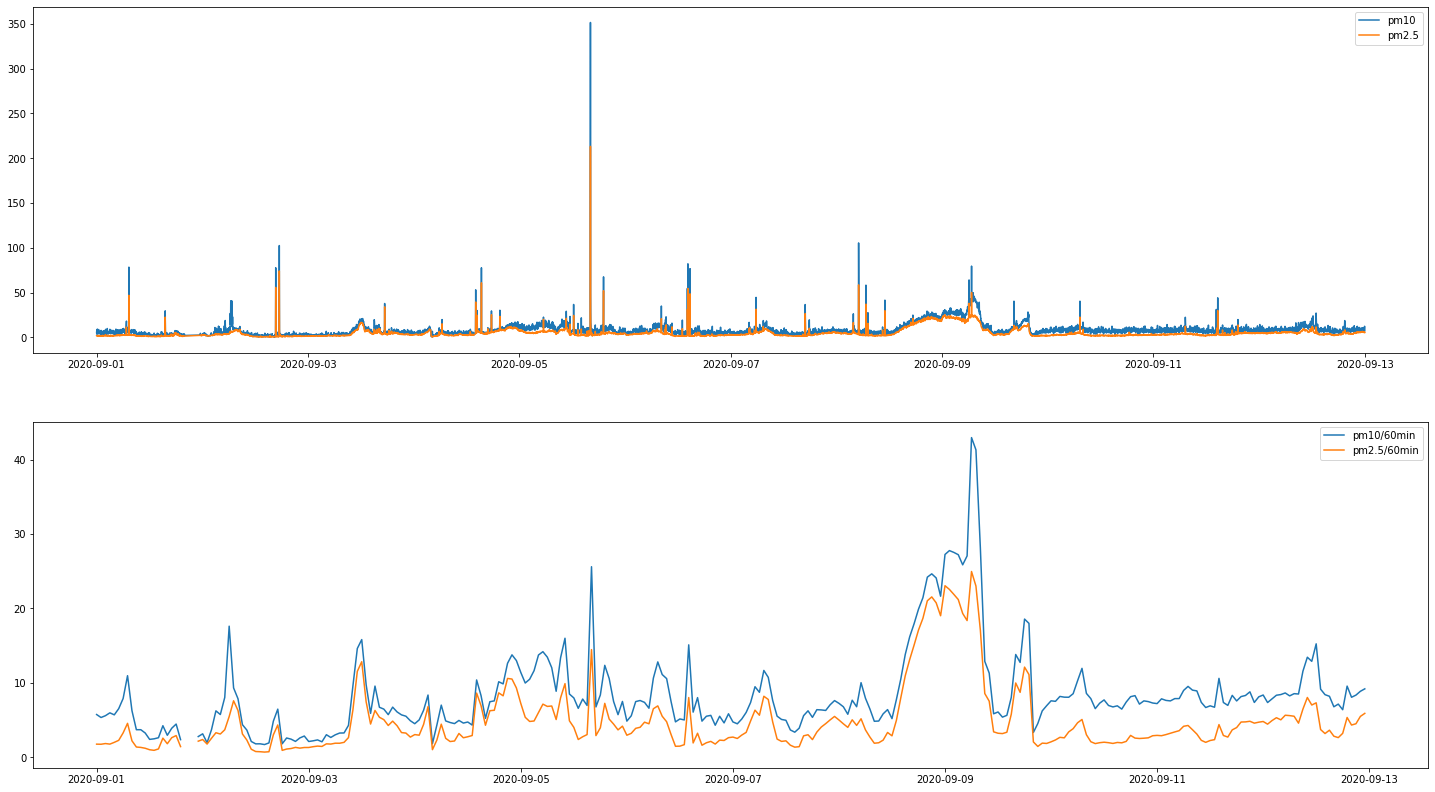

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList[-5:])

11224
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet
9547
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet
564
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet
31035
2020-09-05
	does not exist jet
	no data
4857
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet


In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-12 23:40:04,4857,SDS011,2443,51.978,8.472,16.52,NaN,NaN,8.07,NaN,NaN
2020-09-12 23:45:00,4857,SDS011,2443,51.978,8.472,12.57,NaN,NaN,8.50,NaN,NaN
2020-09-12 23:49:56,4857,SDS011,2443,51.978,8.472,10.95,NaN,NaN,8.30,NaN,NaN


## Getting a list of all sensors located in OWL

In [197]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
sensor_df = pd.DataFrame(rdata)

In [198]:
df = sensor_df.copy()

In [199]:
# longitudes
longitude_min = 8.3255 #north
longitude_max = 9.5537

# latitudes
latitude_max = 52.2396 #west
latitude_min = 51.4762

In [200]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [201]:
df = df[df['sensor'].map(lambda x: 'SDS011' in x['sensor_type'].values())]

In [202]:
df.shape

(11558, 6)

In [203]:
longitude = df['location'].apply(lambda x: x.get('longitude'))
latitude = df['location'].apply(lambda x: x.get('latitude'))

In [204]:
df = df.assign(longitude = longitude.values)
df = df.assign(latitude = latitude.values)

In [205]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
1,1923802098,NaN,2020-09-19 13:13:01,"{'id': 9059, 'latitude': '49.934', 'longitude'...","{'id': 17866, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345539, 'value': '2.62', 'value_ty...",8.65,49.934
2,1923802097,NaN,2020-09-19 13:13:01,"{'id': 6091, 'latitude': '51.432', 'longitude'...","{'id': 12059, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345537, 'value': '1.90', 'value_ty...",6.88,51.432
3,1923802096,NaN,2020-09-19 13:13:01,"{'id': 11726, 'latitude': '50.122', 'longitude...","{'id': 23113, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345535, 'value': '3.38', 'value_ty...",8.832,50.122
5,1923802094,NaN,2020-09-19 13:13:01,"{'id': 14313, 'latitude': '50.892', 'longitude...","{'id': 26698, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345531, 'value': '1.40', 'value_ty...",13.756,50.892
8,1923802091,NaN,2020-09-19 13:13:01,"{'id': 1813, 'latitude': '52.016', 'longitude'...","{'id': 3597, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4151345525, 'value': '5.70', 'value_ty...",8.714,52.016
...,...,...,...,...,...,...,...,...
46334,1923755527,NaN,2020-09-19 13:07:52,"{'id': 11812, 'latitude': '53.49', 'longitude'...","{'id': 23286, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244645, 'value': '3.70', 'value_ty...",9.662,53.49
46337,1923755524,NaN,2020-09-19 13:07:52,"{'id': 20426, 'latitude': '48.372', 'longitude...","{'id': 34152, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244639, 'value': '8.10', 'value_ty...",10.888,48.372
46339,1923755522,NaN,2020-09-19 13:07:52,"{'id': 18925, 'latitude': '48.356', 'longitude...","{'id': 32469, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244634, 'value': '7.45', 'value_ty...",10.864,48.356
46347,1923755514,NaN,2020-09-19 13:07:52,"{'id': 27802, 'latitude': '51.232', 'longitude...","{'id': 42136, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244619, 'value': '0.60', 'value_ty...",7.682,51.232


In [206]:
df.drop(['location', 'sampling_rate', 'id'], axis = 1, inplace = True)
df

,timestamp,sensor,sensordatavalues,longitude,latitude
1,2020-09-19 13:13:01,"{'id': 17866, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345539, 'value': '2.62', 'value_ty...",8.65,49.934
2,2020-09-19 13:13:01,"{'id': 12059, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345537, 'value': '1.90', 'value_ty...",6.88,51.432
3,2020-09-19 13:13:01,"{'id': 23113, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345535, 'value': '3.38', 'value_ty...",8.832,50.122
5,2020-09-19 13:13:01,"{'id': 26698, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151345531, 'value': '1.40', 'value_ty...",13.756,50.892
8,2020-09-19 13:13:01,"{'id': 3597, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4151345525, 'value': '5.70', 'value_ty...",8.714,52.016
...,...,...,...,...,...
46334,2020-09-19 13:07:52,"{'id': 23286, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244645, 'value': '3.70', 'value_ty...",9.662,53.49
46337,2020-09-19 13:07:52,"{'id': 34152, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244639, 'value': '8.10', 'value_ty...",10.888,48.372
46339,2020-09-19 13:07:52,"{'id': 32469, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244634, 'value': '7.45', 'value_ty...",10.864,48.356
46347,2020-09-19 13:07:52,"{'id': 42136, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151244619, 'value': '0.60', 'value_ty...",7.682,51.232


In [207]:
df['longitude'] = pd.to_numeric(df.longitude)

In [208]:
df['latitude'] = pd.to_numeric(df.latitude)

In [209]:
df = df[df.longitude <= longitude_max]
df = df[df.longitude >= longitude_min]
df = df[df.latitude <= latitude_max]
df = df[df.latitude >= latitude_min]

In [210]:
df.reset_index(inplace = True, drop = True)

In [211]:
df['SensorID'] = df['sensor'].apply(lambda x: x.get('id'))
df

,timestamp,sensor,sensordatavalues,longitude,latitude,SensorID
0,2020-09-19 13:13:01,"{'id': 3597, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4151345525, 'value': '5.70', 'value_ty...",8.714000,52.016000,3597
1,2020-09-19 13:12:59,"{'id': 4506, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4151344986, 'value': '1.87', 'value_ty...",8.794000,51.728000,4506
2,2020-09-19 13:12:59,"{'id': 35380, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151344963, 'value': '1.33', 'value_ty...",8.378000,51.916000,35380
3,2020-09-19 13:12:56,"{'id': 21004, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151344159, 'value': '249.40', 'value_...",8.754000,51.712000,21004
4,2020-09-19 13:12:51,"{'id': 10029, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151342763, 'value': '0.10', 'value_ty...",8.524000,52.054000,10029
...,...,...,...,...,...,...
229,2020-09-19 13:07:56,"{'id': 10029, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151246162, 'value': '0.33', 'value_ty...",8.524000,52.054000,10029
230,2020-09-19 13:07:55,"{'id': 30685, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151245823, 'value': '1.85', 'value_ty...",8.723751,52.061241,30685
231,2020-09-19 13:07:54,"{'id': 45228, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4151245438, 'value': '1.37', 'value_ty...",8.682000,51.728000,45228
232,2020-09-19 13:07:53,"{'id': 8474, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4151245013, 'value': '1.30', 'value_ty...",8.448000,52.012000,8474


### Plotting Sensor Locations on a map of OWL

In [212]:
boundingBox = (longitude_min, longitude_max, latitude_min, latitude_max)
boundingBox

(8.3255, 9.5537, 51.4762, 52.2396)

In [213]:
owl_map = plt.imread('map.png')

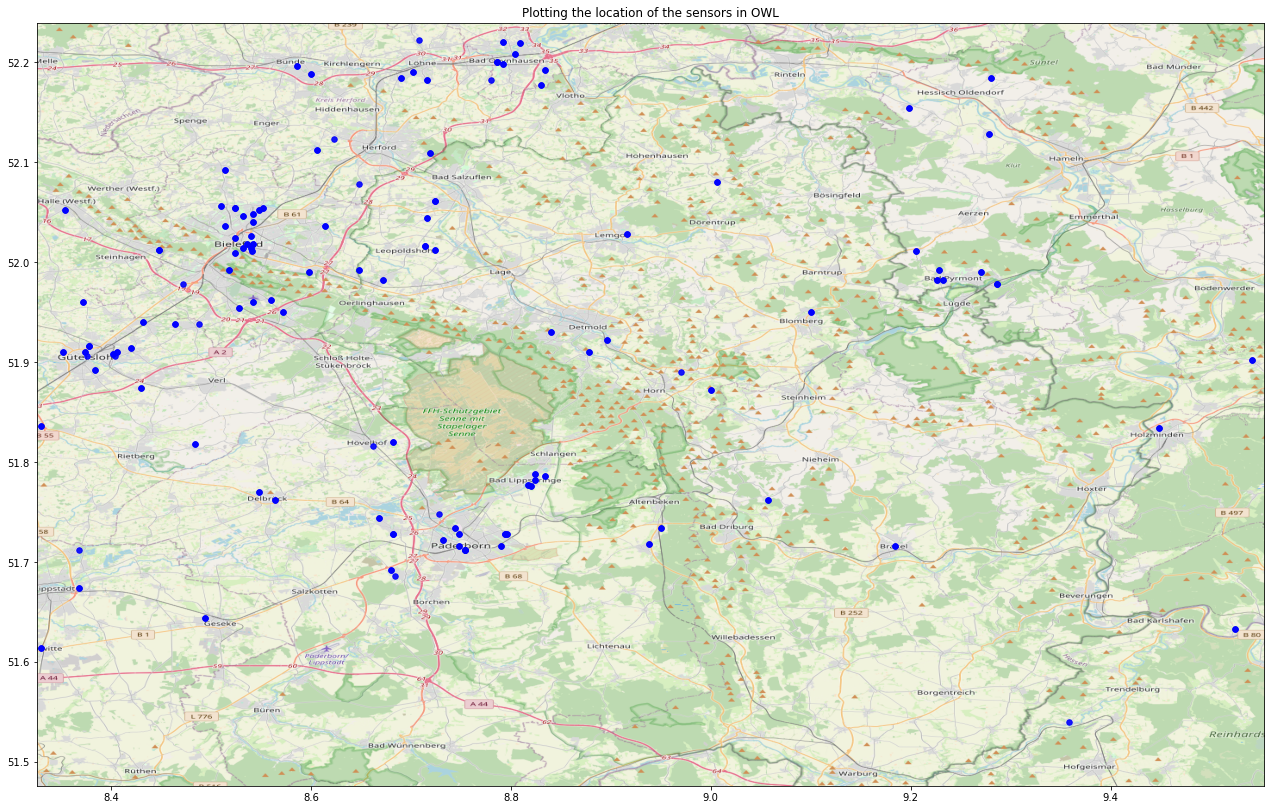

In [214]:
fig, ax = plt.subplots(figsize = (22, 40))

ax.scatter(df.longitude, df.latitude, zorder = 1, alpha = 0.9, c = 'b', s = 30)

ax.set_title('Plotting the location of the sensors in OWL')
ax.set_xlim(boundingBox[0], boundingBox[1])
ax.set_ylim(boundingBox[2], boundingBox[3])

ax.imshow(owl_map, zorder = 0, extent = boundingBox)

In [215]:
sensorList = set(df['SensorID'])
len(sensorList)

118

In [216]:
df['sensordatavalues'][0]

[{'id': 4151345525, 'value': '5.70', 'value_type': 'P1'},
 {'id': 4151345526, 'value': '1.27', 'value_type': 'P2'}]

In [217]:
df.sensordatavalues[0][0]

{'id': 4151345525, 'value': '5.70', 'value_type': 'P1'}

In [218]:
p1 = df['sensordatavalues'].apply(lambda x: x[0]).apply(lambda x: x.get('value'))
p2 = df['sensordatavalues'].apply(lambda x: x[1]).apply(lambda x: x.get('value'))

In [219]:
p1[0]

'5.70'

In [220]:
p2[0]

'1.27'

In [221]:
df['P1'] = p1
df['P2'] = p2

In [222]:
df.drop(['sensor', 'sensordatavalues'], axis = 1, inplace = True)

In [223]:
df

,timestamp,longitude,latitude,SensorID,P1,P2
0,2020-09-19 13:13:01,8.714000,52.016000,3597,5.70,1.27
1,2020-09-19 13:12:59,8.794000,51.728000,4506,1.87,0.80
2,2020-09-19 13:12:59,8.378000,51.916000,35380,1.33,0.95
3,2020-09-19 13:12:56,8.754000,51.712000,21004,249.40,235.73
4,2020-09-19 13:12:51,8.524000,52.054000,10029,0.10,0.10
...,...,...,...,...,...,...
229,2020-09-19 13:07:56,8.524000,52.054000,10029,0.33,0.33
230,2020-09-19 13:07:55,8.723751,52.061241,30685,1.85,0.30
231,2020-09-19 13:07:54,8.682000,51.728000,45228,1.37,0.60
232,2020-09-19 13:07:53,8.448000,52.012000,8474,1.30,1.10
